<br></br>
# **Project4 | word2vec**
<br></br>
## **1 데이터 전처리**

In [1]:
# 살인의 추억 텍스트 불러오기
filename = '../data/movie_memories_of_murder_2003.txt'
with open(filename, 'r', encoding='utf-8') as f:
    texts = f.read()
texts[:500]

In [2]:
from txtutil import txtnoun
skips = {'두만':'박두만', '태윤':'서태윤', '용구':'조용구', '귀옥':'권귀옥', 
         '희봉':'구희봉', '동철':'신동철', '광호':'백광호', '병순':'조병순', 
         '해일':'박해일', '광호의':'백광호', '백광호의':'백광호'}
texts  = txtnoun(filename, skip=skips, tags=['Noun'])
texts[:500]

'박두만\n 서태윤\n 조용구\n 권귀옥\n 구희봉\n 신동철\n 백광호 초반 정박\n 조병순대 후반 변태성향\n 박해일 초반 공장 노동자 유력 용의자\n 선본 남자 동네 양아치 등등\n 초반 전직 간호조무사 마을 야매주사 여인\n 안송여중 학년 학생\n 소현 단짝 친구\n 박보희 이향숙 독고현순 박명자 안미선\n 화면 가득 남자 아이 얼굴\n 햇살 아래 맑은 눈빛 아이 카메라 정면 응시\n 아이 코스모스 잠자리\n 잠자리 가을 푸른 하늘\n 기계소리 아이 고개 멀리 경운기 대가 점점 소리 경운기 운전 노인 뒷칸\n 남자 모습\n 스포츠 머리 건달 인상 풍기 남자 형사 박두만\n 경운기 세운 노인 소리 아이 아이 아랑곳 노인 박두 안내 농수로 배수관\n 화면 등장 여자 시체\n 배수관 어두운 구멍 나체 여자 시신\n 미니 후레쉬 주머니 여자 얼굴 박두만\n 여자 순간 안광이 번뜩\n 위로 파리 개미 토사물 거기 핏자국 새소리 햇살아래 하늘거리 코스모스\n 무덤덤 여자 박보희 시체 뭔가 생경 느낌\n 언제 주위 동네 아이\n 녀석 여자 '

In [3]:
# 명사 Token 작업된 자료를 ssResport.txt 로 저장 
script_file = '../data/mom_script.txt'
with open(script_file, 'w', encoding='utf-8') as file:
    file.write(texts)
    
print("전처리 완료된 대본파일 저장 : {}".format(script_file))

전처리 완료된 대본파일 저장 : ../data/mom_script.txt


In [4]:
# ! cat ./data/ssResport.txt | head -n 10

<br></br>
## **2 Word 2 vec 객체 만들기**
gensim

In [5]:
# ! pip3 install gensim

In [6]:
%%time
from gensim.models import word2vec
data  = word2vec.LineSentence(script_file)
model = word2vec.Word2Vec(data, size=30, window=2, min_count=10, hs=1,
                          workers=4, iter=100, sg=1)

model_file = "../data/mom_script.model"
model.save(model_file)
print("Word 2 Vec 모델 파일 {} 저장완료".format(model_file))

Word 2 Vec 모델 파일 ../data/mom_script.model 저장완료
CPU times: user 3.07 s, sys: 149 ms, total: 3.22 s
Wall time: 3.14 s


<br></br>
## **3 저장된 모델 불러오기 및 확인**
gensim

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
%who

Interactive namespace is empty.


In [9]:
model_file = "../data/mom_script.model"

from gensim.models import word2vec
model = word2vec.Word2Vec.load(model_file)
len(model.wv.vocab.keys())

149

In [10]:
list(model.wv.index2word)

['서태윤',
 '얼굴',
 '박두만',
 '여자',
 '백광호',
 '조용구',
 '박해일',
 '반장',
 '계속',
 '순간',
 '모습',
 '소현',
 '하나',
 '소리',
 '시작',
 '범인',
 '남자',
 '사람',
 '표정',
 '형사',
 '다시',
 '뭔가',
 '권귀옥',
 '지금',
 '고개',
 '잠시',
 '아이',
 '보고',
 '눈빛',
 '설영',
 '여기',
 '얘기',
 '동네',
 '화면',
 '시체',
 '시선',
 '사진',
 '한번',
 '서류',
 '위로',
 '책상',
 '새끼',
 '그림자',
 '멀리',
 '점점',
 '머리',
 '갑자기',
 '이향숙',
 '문득',
 '사건',
 '발자국',
 '자기',
 '가운데',
 '당신',
 '아래',
 '박두',
 '괴남자',
 '저기',
 '스타킹',
 '그냥',
 '목소리',
 '불빛',
 '사무실',
 '진짜',
 '모두',
 '운동화',
 '우리',
 '사이',
 '용의자',
 '현장',
 '조그만',
 '다른',
 '생각',
 '전경',
 '기차',
 '마주',
 '취조실',
 '바로',
 '발견',
 '임마',
 '잠깐',
 '박명자',
 '거기',
 '음악',
 '부분',
 '시점',
 '간다',
 '그거',
 '끄덕',
 '자리',
 '버럭',
 '우산',
 '변소',
 '어디',
 '정말',
 '잔뜩',
 '다리',
 '그대로',
 '똑바로',
 '서서히',
 '가득',
 '인상',
 '후레쉬',
 '너머',
 '순경',
 '저녁',
 '경찰',
 '훈련',
 '언덕',
 '구희봉',
 '카메라',
 '주위',
 '브래지어',
 '분위기',
 '아저씨',
 '구석',
 '피해자',
 '그게',
 '팬티',
 '어리둥절',
 '누군가',
 '라디오',
 '짜증',
 '의경',
 '방송',
 '빗줄기',
 '어둠속',
 '인부',
 '조병순',
 '유전자',
 '바람',
 '서로',
 '주변',
 '참깨밭',
 '근처',
 '듯이',
 '가방',
 

<br></br>
## **4 Word2Vec 모델 내용 확인**
모델을 활용하여 유력한 범인을 찾아보자!!
<img src="../data/test.jpg" width='800'>

In [11]:
# 범인과 관련된 내용 중 사람이름이 안나옴...
model.wv.most_similar('범인', topn=10)

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('우리', 0.7865585088729858),
 ('거기', 0.6849570274353027),
 ('그냥', 0.6495783925056458),
 ('얘기', 0.6051825881004333),
 ('변소', 0.556976318359375),
 ('여기', 0.5490498542785645),
 ('그거', 0.5388651490211487),
 ('당신', 0.5356825590133667),
 ('목소리', 0.5108311772346497),
 ('지금', 0.4941055178642273)]

In [12]:
# 현장과 가장 가깝게 등장한 인물이 1명 등장
model.wv.most_similar('현장', topn=30)

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('사진', 0.7624211311340332),
 ('사건', 0.7531118392944336),
 ('이향숙', 0.6507235765457153),
 ('참깨밭', 0.6247075796127319),
 ('용의자', 0.6074802875518799),
 ('발자국', 0.5978748798370361),
 ('박명자', 0.5688067674636841),
 ('근처', 0.5655137300491333),
 ('보고', 0.5509800910949707),
 ('시점', 0.5463540554046631),
 ('위로', 0.5393446683883667),
 ('뭔가', 0.5333157777786255),
 ('서류', 0.5236180424690247),
 ('우리', 0.5206924676895142),
 ('바로', 0.5205206871032715),
 ('자신', 0.5086743831634521),
 ('경찰', 0.5025227665901184),
 ('범인', 0.48635903000831604),
 ('운동화', 0.47943052649497986),
 ('눈빛', 0.4523496627807617),
 ('백광호', 0.44758379459381104),
 ('박두', 0.44246137142181396),
 ('다른', 0.4404054582118988),
 ('빗물', 0.43429237604141235),
 ('동네', 0.43380171060562134),
 ('박두만', 0.42826181650161743),
 ('순경', 0.41471391916275024),
 ('휴지', 0.41173797845840454),
 ('전경', 0.40328073501586914),
 ('이건', 0.39376869797706604)]

In [13]:
# 현장 과 백광호 와 밀접한 증거들 중에 방해가 되는 내용을 찾는다
model.wv.most_similar(['현장','백광호'], topn=20)

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('사진', 0.7669464349746704),
 ('용의자', 0.7378604412078857),
 ('사건', 0.6748584508895874),
 ('박두만', 0.6610932350158691),
 ('뭔가', 0.6300857067108154),
 ('이향숙', 0.603473424911499),
 ('박명자', 0.6030692458152771),
 ('발자국', 0.5998727083206177),
 ('서류', 0.5618202686309814),
 ('조용구', 0.5536451935768127),
 ('보고', 0.553490161895752),
 ('휴지', 0.550575315952301),
 ('얼굴', 0.534464418888092),
 ('참깨밭', 0.5263034105300903),
 ('근처', 0.5258156061172485),
 ('운동화', 0.5036986470222473),
 ('똑바로', 0.48997318744659424),
 ('자신', 0.4897308349609375),
 ('표정', 0.4776860773563385),
 ('잔뜩', 0.4768100380897522)]

In [14]:
# 현장 과 백광호 와 밀접한 증거들 중에 '참깨밭' 이 계속 방해가 됨
# 참깨밭에 백광호가 밀접하게 연결되어 있어서 이를 제외한 분석이 필요
model.wv.most_similar(['현장','백광호'], negative=['참깨밭'], topn=20)

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('용의자', 0.6298692226409912),
 ('사진', 0.5734076499938965),
 ('똑바로', 0.5540914535522461),
 ('얼굴', 0.508164644241333),
 ('보고', 0.4970995783805847),
 ('사건', 0.49044185876846313),
 ('서류', 0.48188555240631104),
 ('박해일', 0.47131142020225525),
 ('박두만', 0.45509785413742065),
 ('구희봉', 0.45389503240585327),
 ('박명자', 0.42978203296661377),
 ('임마', 0.42314696311950684),
 ('잠시', 0.4125210642814636),
 ('서태윤', 0.4119667410850525),
 ('뭔가', 0.4035834074020386),
 ('조용구', 0.40272825956344604),
 ('다리', 0.40199974179267883),
 ('시점', 0.401559978723526),
 ('그대로', 0.39520251750946045),
 ('휴지', 0.385613352060318)]

<br></br>
## **5 Visulaization**
gensim

In [15]:
list(model.wv.vocab.keys())[:10]

['박두만', '서태윤', '조용구', '권귀옥', '구희봉', '백광호', '박해일', '용의자', '남자', '동네']

In [16]:
# 같은 벡터의 데이터 끼지 색을 일치시킨다
labels, tokens = [], []

for word in model.wv.vocab:
    tokens.append(model.wv[word])
    labels.append(word)

In [17]:
%whos

Variable     Type        Data/Info
----------------------------------
labels       list        n=149
model        Word2Vec    Word2Vec(vocab=149, size=30, alpha=0.025)
model_file   str         ../data/mom_script.model
tokens       list        n=149
word         str         총구
word2vec     module      <module 'gensim.models.wo<...>nsim/models/word2vec.py'>


In [18]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2)#, perplexity=40, init='pca', n_iter=1500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

In [19]:
import pandas as pd
df = pd.DataFrame(new_values, 
                  index   = labels, 
                  columns = ['x', 'y'])
df.head()

,x,y
박두만,0.382489,-0.920999
서태윤,0.050657,-0.816963
조용구,-0.011590,-0.974972
권귀옥,-0.434078,-2.002993
구희봉,-3.076876,-1.599230


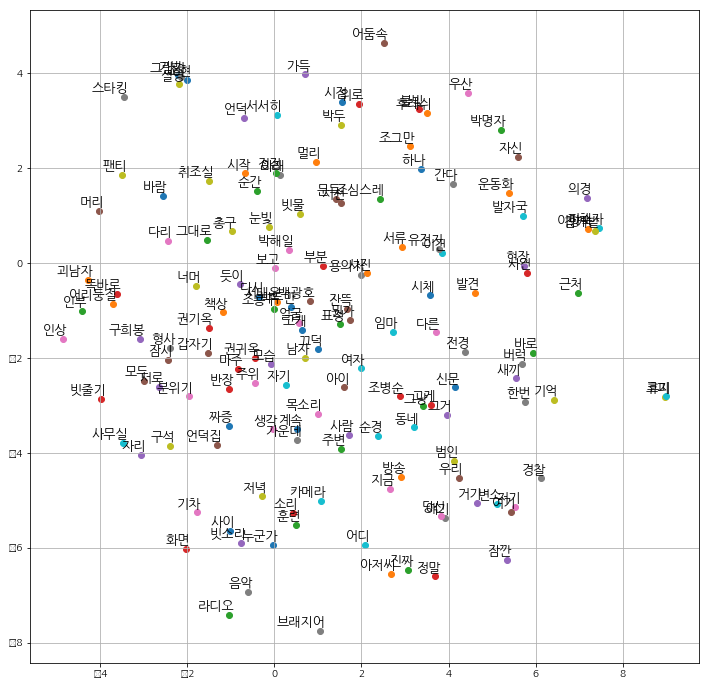

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family=['NanumGothic','Malgun Gothic'])
plt.figure(figsize=(12,12)) 

for i in range(len(df)):
    plt.scatter(df['x'][i],df['y'][i])
    plt.annotate(df.index[i],
                 xy = (df['x'][i], df['y'][i]),
                 xytext = (5, 2),
                 fontsize = 13,
                 textcoords = 'offset points',
                 ha = 'right',
                 va = 'bottom')
plt.grid()
plt.show()

<br></br>
## **6 결과의 해석 및 활용**
1. 유사관계, 반대관계로 **출력된 모든 Token들이 가치가 있지는 않다**
1. **min_count, Vector 갯수** 2가지 조건만 사용하여 모델을 생성한다
1. Word2Vec 도 **문서를 분석하는 도구**에 불과 (절대적 **가치를 창출하는 기법** 으로 오해 X)
1. 해당 분야의 **잘 정리된 Document로 학습한 Word2Vec 모델** 에서 **유의미 한 token 들의 관계** 를 Template으로 잘 정리
1. 분석대상 문서를 **유사한 조건으로 word2vec 모델** 을 만들고, **앞에서 정리된 Template와** 비교하여 결과
다듬기
1. 시나리오의 분석 경우
    1. 결과물 중 인물의 Token 만 활용하여 분석
    1. 결과물 중 증거물의 Token 만 활용하여 분석
    1. 결과물 중 장소의 Token 만 활용하여 분석

In [21]:
# model 에 등장하는 인물들
charator = ["박두만", "서태윤", "조용구", "권귀옥", "구희봉", "신동철", "백광호",
            "조병순", "박해일", "박보희", "이향숙", "독고현순", "박명자", "안미선", 
            "반장", "소현", "범인", "형사", '괴남자', '순경','피해자', '권기옥','용의자']

In [22]:
# model 에 등장하는 장소명 들
area = ['현장', '사무실', '취조실', '변소', '참깨밭', '빗줄기', '어둠속', '언덕집']

In [23]:
# model 에 등장하는 Item 들
items = ['브래지어', '팬티', '우산', '운동화', '스타킹', '목소리', '불빛', '음악', '후레쉬', 
         '카메라', '라디오', '방송', '유전자', '가방', '코피', '휴지', '신문', '총구']